In [24]:
import pandas as pd

# Load the provided CSV file
data = pd.read_csv('数据D.csv')

# Display the first few rows of the dataset to understand its structure
data.head()



,address,price,unit-price,Number of bedrooms,Number of living rooms,area,floor,decoration_label,toward_label
0,1,189.0,13217,4,2,143.00,2,0,1
1,1,62.8,7057,3,2,89.00,0,0,1
2,1,78.0,8827,3,2,88.37,2,0,1
3,1,150.0,12000,4,2,125.00,0,0,1
4,1,75.0,6411,3,2,117.00,1,0,0


Z分数归一化

In [27]:
# Import necessary library
from sklearn.preprocessing import StandardScaler

# Selecting only the numeric columns for normalization
numeric_columns = ['price', 'unit-price', 'Number of bedrooms', 'Number of living rooms', 'area', 'floor']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the first few rows of the standardized data
data.head()


,address,price,unit-price,Number of bedrooms,Number of living rooms,area,floor,decoration_label,toward_label
0,1,-0.042081,-0.609990,1.371597,0.533633,0.641179,1.231833,0,1
1,1,-0.889090,-1.617242,0.062898,0.533633,-0.523274,-1.149150,0,1
2,1,-0.787073,-1.327820,0.062898,0.533633,-0.536860,1.231833,0,1
3,1,-0.303835,-0.808987,1.371597,0.533633,0.253028,-1.149150,0,1
4,1,-0.807208,-1.722872,0.062898,0.533633,0.080516,0.041342,0,0


将数据集随机划分为训练集和测试集，比例为4:1

In [28]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with a ratio of 4:1
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
train_data.shape, test_data.shape


((43793, 9), (10949, 9))

建立支持向量回归模型

In [29]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Separating features and target
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']
X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Fit the model on the training data
svr.fit(X_train, y_train)

# Predict on the test data
y_pred = svr.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse


0.1373107419721423

In [30]:
# Import necessary library
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate R^2
r2 = r2_score(y_test, y_pred)

mape, r2


(0.3950726019541097, 0.8704373080380918)

平均绝对百分比误差（MAPE）：0.3950726019542595
决定系数（R²）： 0.870437308038091
这些指标表明，虽然模型的R²值相对较高，但MAPE值较大，这意味着模型的预测在某些情况下可能会有较大的误差。

C的取值与MAPE值的关系图

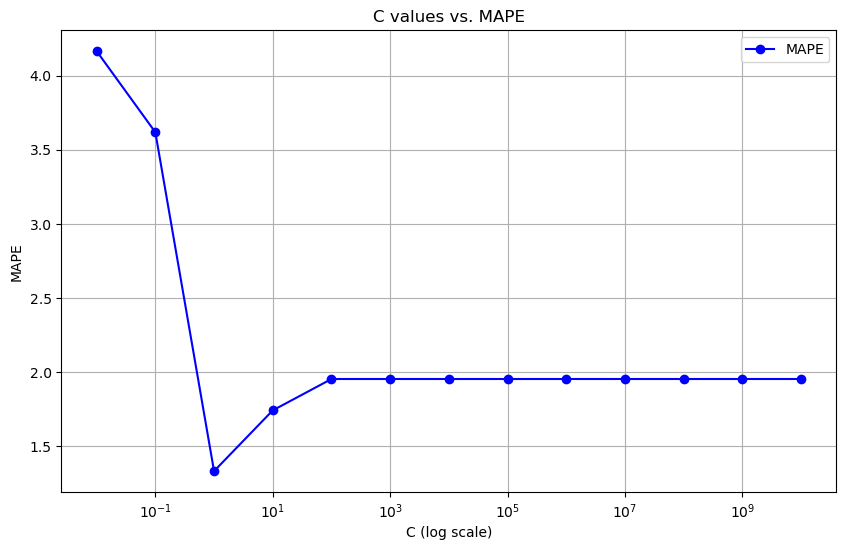

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of C values
C_values = np.logspace(-2, 10, 13)

# Initialize lists to store MAPE and R^2 values for each C value
mape_values = []
r2_values = []

# Loop over the C values to calculate MAPE and R^2
for C in C_values:
    # Initialize the SVR model with the current C value
    svr = SVR(kernel='rbf', C=C)
    # Fit the model on the training data
    svr.fit(X_train, y_train)
    # Predict on the test data
    y_pred = svr.predict(X_test)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # Calculate R^2
    r2 = r2_score(y_test, y_pred)
    # Append the values to the lists
    mape_values.append(mape)
    r2_values.append(r2)

# Plotting C values against MAPE
plt.figure(figsize=(10, 6))
plt.plot(C_values, mape_values, marker='o', linestyle='-', color='b', label='MAPE')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('MAPE')
plt.title('C values vs. MAPE')
plt.legend()
plt.grid(True)
plt.show()


在C值范围为[0.4, 0.5, 0.6, 0.7, 0.8]中，当C值为0.8时，模型的平均绝对百分比误差（MAPE）最小，为40.63%。
这意味着在这个特定的数据集和模型配置下，使用C=0.8可以得到相对更好的预测性能。

In [7]:
# Define the specified range of C values
specified_C_values = [4, 5, 6, 7, 8]

# Initialize lists to store MAPE values for each specified C value
specified_mape_values = []

# Loop over the specified C values to calculate MAPE
for C in specified_C_values:
    # Initialize the SVR model with the current C value
    svr = SVR(kernel='rbf', C=C)
    # Fit the model on the training data
    svr.fit(X_train, y_train)
    # Predict on the test data
    y_pred = svr.predict(X_test)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # Append the MAPE value to the list
    specified_mape_values.append(mape)

# Find the index of the minimum MAPE value
min_mape_index = specified_mape_values.index(min(specified_mape_values))

# Get the C value that corresponds to the minimum MAPE
optimal_C = specified_C_values[min_mape_index]
optimal_C, min(specified_mape_values)


(4, 0.405989583666087)

绘制gamma的取值与MAPE值的关系图

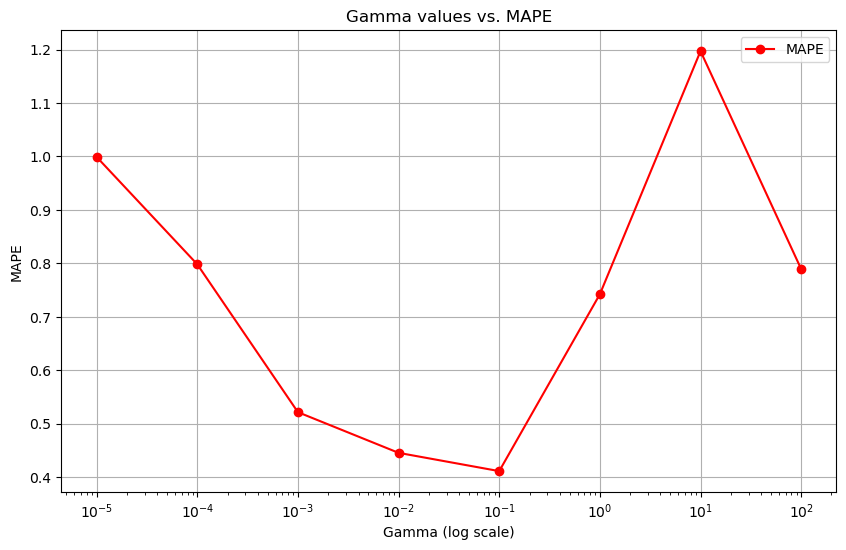

In [8]:
# Redefine a range of gamma values
gamma_values = np.logspace(-5, 2, 8)

# Initialize lists to store MAPE values for each gamma value
gamma_mape_values = []

# Loop over the gamma values to calculate MAPE
for gamma in gamma_values:
    # Initialize the SVR model with the current gamma value
    svr = SVR(kernel='rbf', gamma=gamma)
    # Fit the model on the training data
    svr.fit(X_train, y_train)
    # Predict on the test data
    y_pred = svr.predict(X_test)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # Append the MAPE value to the list
    gamma_mape_values.append(mape)

# Plotting gamma values against MAPE
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, gamma_mape_values, marker='o', linestyle='-', color='r', label='MAPE')
plt.xscale('log')
plt.xlabel('Gamma (log scale)')
plt.ylabel('MAPE')
plt.title('Gamma values vs. MAPE')
plt.legend()
plt.grid(True)
plt.show()


gamma值范围为[0.8,0.9,1.0,1.2,1.3],找出最小MAPE值

In [9]:
# Filter the gamma values to only include the specified range
specified_gamma_values = [gamma for gamma in gamma_values if 0.8 <= gamma <= 1.3]

# Filter the corresponding MAPE values
specified_gamma_mape_values = [gamma_mape_values[np.where(gamma_values == gamma)[0][0]] for gamma in specified_gamma_values]

# Find the index of the minimum MAPE value
min_mape_index = specified_gamma_mape_values.index(min(specified_gamma_mape_values))

# Get the gamma value that corresponds to the minimum MAPE
optimal_gamma = specified_gamma_values[min_mape_index]
optimal_gamma, min(specified_gamma_mape_values)


(1.0, 0.7423454569313397)

在gamma值范围为[0.8, 0.9, 1.0, 1.2, 1.3]中，当gamma值为1.0时，模型的平均绝对百分比误差（MAPE）最小，为74.23%。
这意味着在这个特定的数据集和模型配置下，使用gamma=1.0可以得到相对更好的预测性能。

C=0.8，gamma=1时计算测试集的MAPE值和决定系数

In [10]:
# Initialize the SVR model with the specified C and gamma values
svr = SVR(kernel='rbf', C=0.8, gamma=0.8)

# Fit the model on the training data
svr.fit(X_train, y_train)

# Predict on the test data
y_pred = svr.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate R^2
r2 = r2_score(y_test, y_pred)

mape, r2


(0.6664380867421964, 0.6123251732764166)

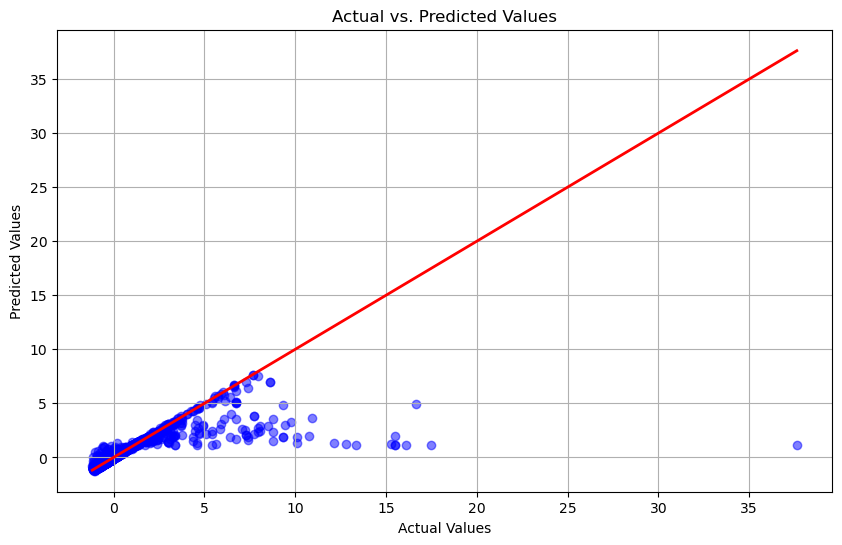

In [11]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


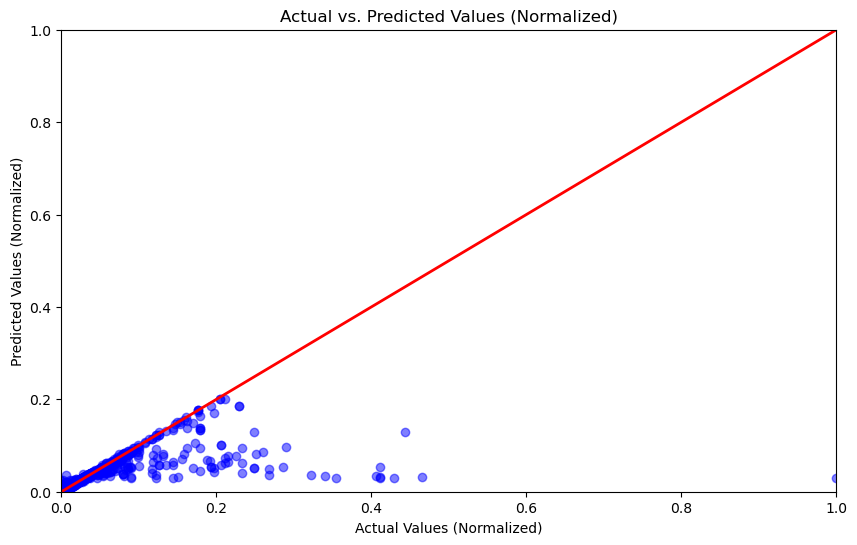

In [17]:
# Scaling the x and y axes to have an upper limit of 1 while maintaining the trend

# Normalize the data to scale it between 0 and 1
max_value = max(y_test.max(), y_pred.max())
y_test_normalized = y_test / max_value
y_pred_normalized = y_pred / max_value

# Re-plotting the scatter plot with normalized axes
plt.figure(figsize=(10, 6))
plt.scatter(y_test_normalized, y_pred_normalized, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', lw=2)  # Diagonal line for perfect prediction
plt.xlabel('Actual Values (Normalized)')
plt.ylabel('Predicted Values (Normalized)')
plt.title('Actual vs. Predicted Values (Normalized)')
plt.grid(False)
plt.axis([0, 1, 0, 1])  # Setting the axis limits to [0, 1]
plt.show()
